In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
def makeRandom(y_test):
    rands = []
    for counter in range(len(y_test)):
        rands.append(np.random.choice(list(range(1,300))))
    return rands

def reportRegressor(model,X_cross,y_cross,X_test,y_test):
    validationSetMSE = metrics.mean_squared_error(y_cross,model.predict(X_cross))
    validationSetR2 = metrics.r2_score(y_cross,model.predict(X_cross))
    testSetMSE = metrics.mean_squared_error(y_test,model.predict(X_test))
    testSetR2 = metrics.r2_score(y_test,model.predict(X_test))
    random_predicts = makeRandom(y_test)
    randomMSE = metrics.mean_squared_error(y_test,random_predicts)
    randomR2 = metrics.r2_score(y_test,random_predicts)
    print('Validation-set:\n\tMean Squared Error: ' , validationSetMSE , '\n\tR2 Score: ' , validationSetR2)
    print('\nTest-set:\n\tMean Squared Error: ' , testSetMSE , '\n\tR2 Score: ' , testSetR2)
    print('\nRandom Predicts on Test-set:\n\tMean Squared Error: ' , randomMSE , '\n\tR2 Score: ' , randomR2)

In [76]:
# class predict_latency_model():
#     def __init__(self):
        
latencyDF = pd.read_csv('data.csv')
ss = StandardScaler()
temp = list(latencyDF.columns)
temp.remove('Latency')
ss = StandardScaler()
latencyDF[temp] = ss.fit_transform(latencyDF.drop('Latency',axis=1))

In [582]:
# X_train = pd.DataFrame(columns=latencyDF.columns)
# for i in range(len(latencyDF)):
#     if ((i%7 != 6) and (i%7 != 5)):
#         X_train = X_train.append(latencyDF.iloc[i],ignore_index = False)

In [583]:
# X_train.head(16)

,Pre-Test Saline ml/kg,Post-Train Saline ml/kg,Post-Train Morphine mg/kg,Pre-Test Nicotine mg/kg,Pre-Test MDMA lg/rat CeA,Pre-Test Vehicle ml/kg,Pre-Test Mecamylamine lg/rat CeA,Pre-Test (S)-WAY 100135 lg/rat CeA,Pre-Test ACPA ng/rat CeA,Pre-Test AM251 ng/rat CeA,...,Pre-Test AM251 ng/rat mPFC,Pre-Test DXM mg/kg,Post-Train DXM mg/kg,Pre-Test Morphine mg/kg,Pre-Test Ethanol g/kg,Pre-Test Vehicle lL/rat BLA,"Pre-Test WIN 55,212-2 lg/rat BLA",Pre-Test AM251 ng/rat BLA,Pre-Test Saline lL/rat CeA,Latency
0,2.173508,-0.469668,-1.236199,-0.308714,-0.328748,-0.554154,-0.230567,-0.209822,-0.230567,-0.230567,...,-0.23612,-0.362945,-0.223749,-0.218112,-0.229528,-0.176227,-0.220763,-0.23612,-0.326599,187.0
1,2.173508,-0.469668,-1.236199,-0.308714,-0.328748,-0.554154,-0.230567,-0.209822,-0.230567,-0.230567,...,-0.23612,-0.362945,-0.223749,-0.218112,-0.229528,-0.176227,-0.220763,-0.23612,-0.326599,300.0
2,2.173508,-0.469668,-1.236199,-0.308714,-0.328748,-0.554154,-0.230567,-0.209822,-0.230567,-0.230567,...,-0.23612,-0.362945,-0.223749,-0.218112,-0.229528,-0.176227,-0.220763,-0.23612,-0.326599,300.0
3,2.173508,-0.469668,-1.236199,-0.308714,-0.328748,-0.554154,-0.230567,-0.209822,-0.230567,-0.230567,...,-0.23612,-0.362945,-0.223749,-0.218112,-0.229528,-0.176227,-0.220763,-0.23612,-0.326599,300.0
4,2.173508,-0.469668,-1.236199,-0.308714,-0.328748,-0.554154,-0.230567,-0.209822,-0.230567,-0.230567,...,-0.23612,-0.362945,-0.223749,-0.218112,-0.229528,-0.176227,-0.220763,-0.23612,-0.326599,153.0
7,2.173508,-0.469668,-0.251196,-0.308714,-0.328748,-0.554154,-0.230567,-0.209822,-0.230567,-0.230567,...,-0.23612,-0.362945,-0.223749,-0.218112,-0.229528,-0.176227,-0.220763,-0.23612,-0.326599,279.0
8,2.173508,-0.469668,-0.251196,-0.308714,-0.328748,-0.554154,-0.230567,-0.209822,-0.230567,-0.230567,...,-0.23612,-0.362945,-0.223749,-0.218112,-0.229528,-0.176227,-0.220763,-0.23612,-0.326599,173.0
9,2.173508,-0.469668,-0.251196,-0.308714,-0.328748,-0.554154,-0.230567,-0.209822,-0.230567,-0.230567,...,-0.23612,-0.362945,-0.223749,-0.218112,-0.229528,-0.176227,-0.220763,-0.23612,-0.326599,193.0
10,2.173508,-0.469668,-0.251196,-0.308714,-0.328748,-0.554154,-0.230567,-0.209822,-0.230567,-0.230567,...,-0.23612,-0.362945,-0.223749,-0.218112,-0.229528,-0.176227,-0.220763,-0.23612,-0.326599,300.0
11,2.173508,-0.469668,-0.251196,-0.308714,-0.328748,-0.554154,-0.230567,-0.209822,-0.230567,-0.230567,...,-0.23612,-0.362945,-0.223749,-0.218112,-0.229528,-0.176227,-0.220763,-0.23612,-0.326599,238.0


In [77]:
X_train, X_test, y_train, y_test = train_test_split(latencyDF.drop('Latency',axis=1), latencyDF['Latency'], test_size=0.2, random_state=None, shuffle = True)
X_others, X_cross, y_others, y_cross = train_test_split(X_train, y_train, test_size=0.2, random_state=None, shuffle = True)

# Decision Tree

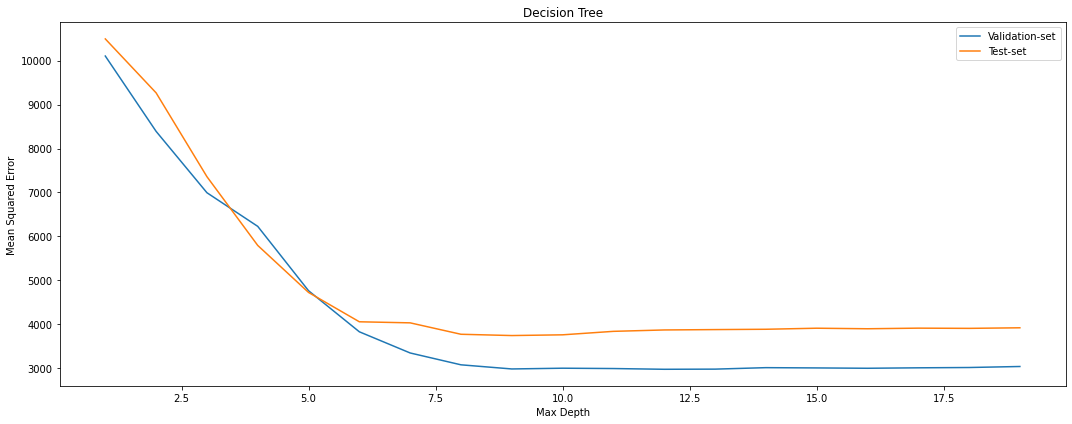

In [78]:
from sklearn.tree import DecisionTreeRegressor
validation_acc = {}
test_acc = {}
for i in range(1,20):
    decisionTree = DecisionTreeRegressor(max_depth=i)
    decisionTree.fit(X_train,y_train)
    validation_acc[i] = metrics.mean_squared_error(y_cross,decisionTree.predict(X_cross))
    test_acc[i] = metrics.mean_squared_error(y_test,decisionTree.predict(X_test))

plt.figure(figsize=(15,6))
plt.title('Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.plot(list(validation_acc.keys()),list(validation_acc.values()),label = "Validation-set")
plt.plot(list(test_acc.keys()),list(test_acc.values()),label = "Test-set")
plt.tight_layout()
plt.legend()
plt.show()

In [133]:
X_train, X_test, y_train, y_test = train_test_split(latencyDF.drop('Latency',axis=1), latencyDF['Latency'], test_size=0.2, random_state=None, shuffle = True)
X_others, X_cross, y_others, y_cross = train_test_split(X_train, y_train, test_size=0.2, random_state=None, shuffle = True)
X_train, X_test, y_train, y_test = train_test_split(latencyDF.drop('Latency',axis=1), latencyDF['Latency'], test_size=0.2, random_state=None, shuffle = True)
X_others, X_cross, y_others, y_cross = train_test_split(X_train, y_train, test_size=0.2, random_state=None, shuffle = True)
decisionTree = DecisionTreeRegressor(max_depth=10)
decisionTree.fit(X_train,y_train)
reportRegressor(decisionTree,X_cross,y_cross,X_test,y_test)

Validation-set:
	Mean Squared Error:  3200.8235546150227 
	R2 Score:  0.7784035245122786

Test-set:
	Mean Squared Error:  3167.7173852158794 
	R2 Score:  0.7647669785442516

Random Predicts on Test-set:
	Mean Squared Error:  20813.450643776825 
	R2 Score:  -0.5455958617728938


## Logistic Regression

In [134]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
reportRegressor(linear_regressor,X_cross,y_cross,X_test,y_test)

Validation-set:
	Mean Squared Error:  7943.372721083802 
	R2 Score:  0.45007171796784917

Test-set:
	Mean Squared Error:  7250.869818381587 
	R2 Score:  0.46155423349297464

Random Predicts on Test-set:
	Mean Squared Error:  18893.96566523605 
	R2 Score:  -0.4030559201580275


# SVM


In [135]:
from sklearn.svm import SVR
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] , 'epsilon' : [0.1,0.2,0.5,0.001,0.0001]} 
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
# grid.fit(X_train,y_train)
# grid.best_params_
svr = SVR(C = 100 , epsilon=0.2,gamma=1,kernel='rbf')
svr.fit(X_train,y_train)
reportRegressor(svr,X_cross,y_cross,X_test,y_test)

Validation-set:
	Mean Squared Error:  3512.220696442741 
	R2 Score:  0.7568451636940198

Test-set:
	Mean Squared Error:  3729.6669230192197 
	R2 Score:  0.7230369024017006

Random Predicts on Test-set:
	Mean Squared Error:  19452.854077253218 
	R2 Score:  -0.4445586787150202


# Random Forrest

In [136]:
from sklearn.ensemble import RandomForestRegressor
# param_grid = {'n_estimators': [10, 50, 100, 500, 1000], 'max_depth': [5,10,15,20,30]} 
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(RandomForestRegressor(),param_grid,refit=True,verbose=3)
# grid.fit(X_train,y_train)

In [137]:
# grid.best_params_

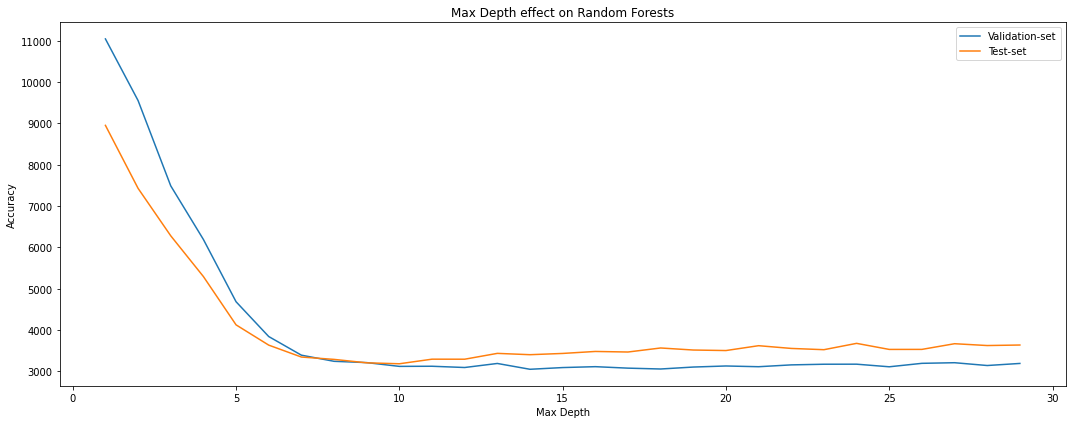

In [138]:
validation_acc = {}
test_acc = {}
for i in range(1,30):
    rfc = RandomForestRegressor(n_estimators=50,max_depth=i)
    rfc.fit(X_train,y_train)
    validation_acc[i] = metrics.mean_squared_error(y_cross,rfc.predict(X_cross))
    test_acc[i] = metrics.mean_squared_error(y_test,rfc.predict(X_test))

plt.figure(figsize=(15,6))
plt.title('Max Depth effect on Random Forests')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.plot(list(validation_acc.keys()),list(validation_acc.values()),label = "Validation-set")
plt.plot(list(test_acc.keys()),list(test_acc.values()),label = "Test-set")
plt.tight_layout()
plt.legend()
plt.show()

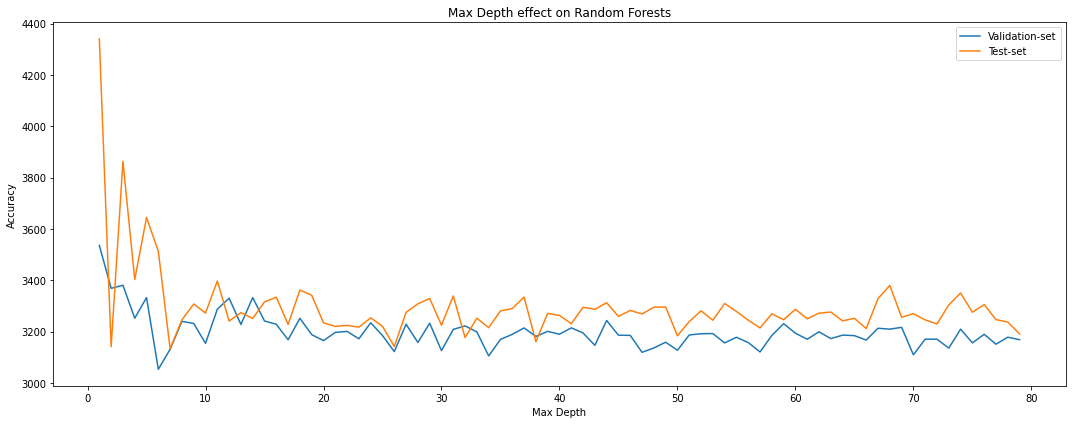

In [139]:
validation_acc = {}
test_acc = {}
for i in range(1,80):
    rfc = RandomForestRegressor(n_estimators=i,max_depth=10)
    rfc.fit(X_train,y_train)
    validation_acc[i] = metrics.mean_squared_error(y_cross,rfc.predict(X_cross))
    test_acc[i] = metrics.mean_squared_error(y_test,rfc.predict(X_test))

plt.figure(figsize=(15,6))
plt.title('Max Depth effect on Random Forests')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.plot(list(validation_acc.keys()),list(validation_acc.values()),label = "Validation-set")
plt.plot(list(test_acc.keys()),list(test_acc.values()),label = "Test-set")
plt.tight_layout()
plt.legend()
plt.show()

No handles with labels found to put in legend.


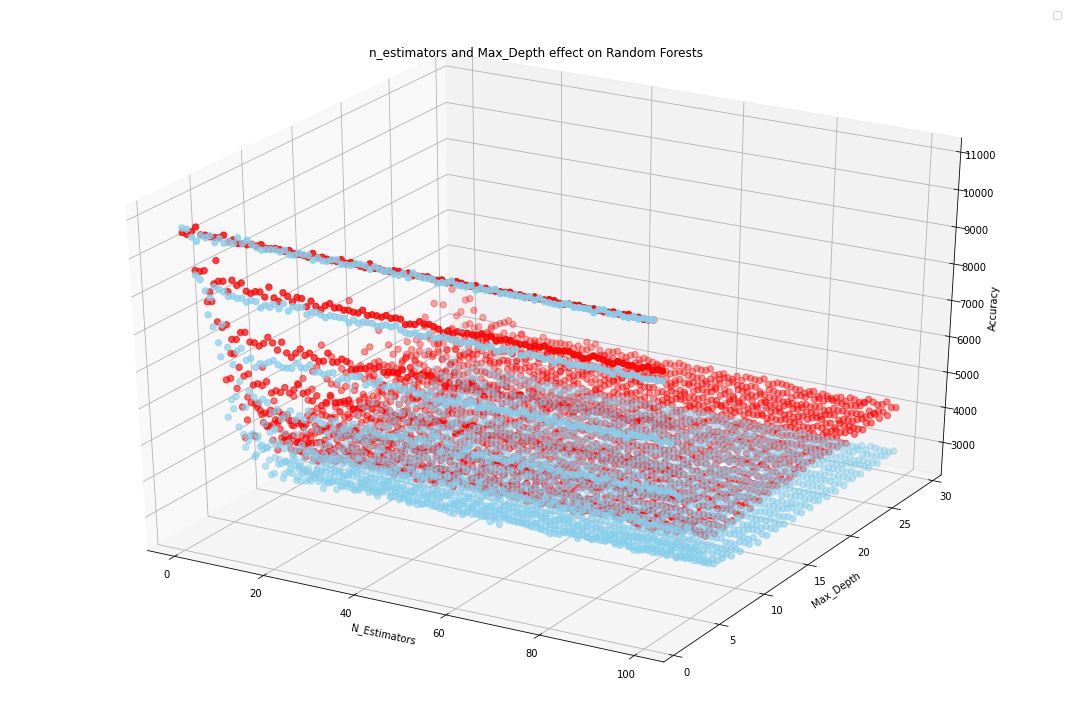

In [17]:
from mpl_toolkits import mplot3d

validation_acc = {}
test_acc = {}
for i in range(1,100):
    for j in range(1,30):
        rfc = RandomForestRegressor(n_estimators=i,max_depth=j)
        rfc.fit(X_train,y_train)
        validation_acc[(i,j)] = metrics.mean_squared_error(y_cross,rfc.predict(X_cross))
        test_acc[(i,j)] = metrics.mean_squared_error(y_test,rfc.predict(X_test))


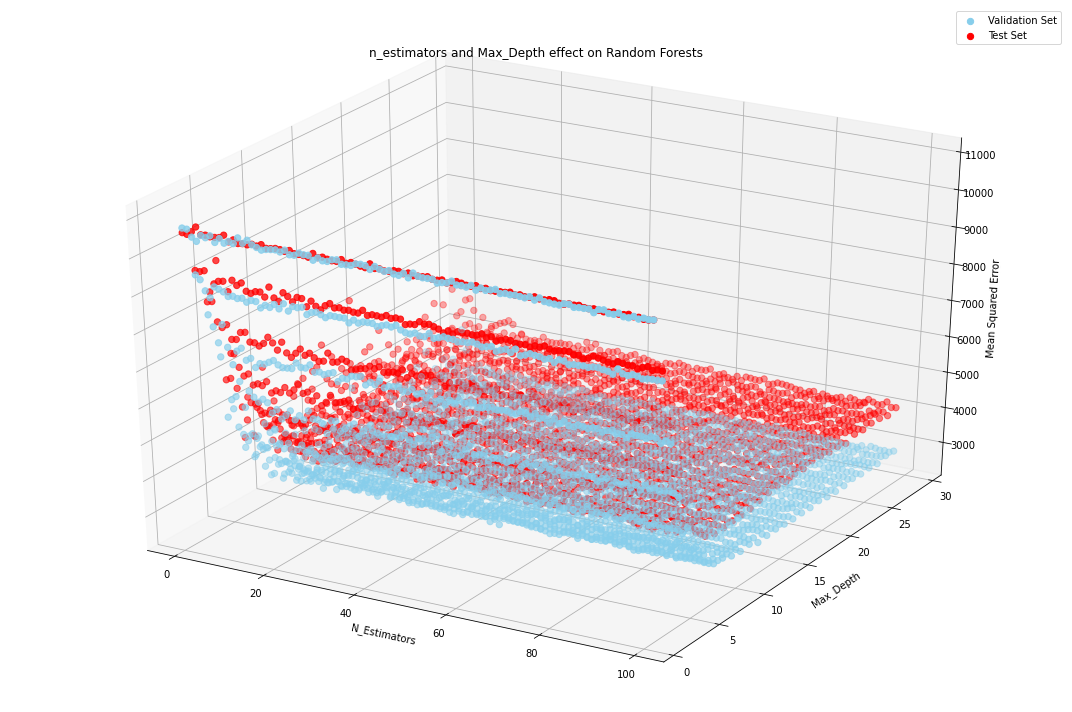

In [26]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

X = []
Y = []
for i in list(validation_acc.keys()):
    X.append(i[0])
    Y.append(i[1])
ax.scatter(X,Y,list(validation_acc.values()),c='skyblue', s=40,label='Validation Set')

X = []
Y = []
for i in list(test_acc.keys()):
    X.append(i[0])
    Y.append(i[1])
ax.scatter(X,Y,list(test_acc.values()),c='red', s=40,label='Test Set')

ax.set_xlabel('N_Estimators')
ax.set_ylabel('Max_Depth')
ax.set_zlabel('Mean Squared Error');
plt.title('n_estimators and Max_Depth effect on Random Forests')
plt.tight_layout()
plt.legend()
plt.show()

In [140]:
rfr = RandomForestRegressor(n_estimators=20,max_depth=9)
rfr.fit(X_train,y_train)
reportRegressor(rfr,X_cross,y_cross,X_test,y_test)

Validation-set:
	Mean Squared Error:  3295.18316737121 
	R2 Score:  0.7718709064974527

Test-set:
	Mean Squared Error:  3294.9863828165117 
	R2 Score:  0.7553160499409094

Random Predicts on Test-set:
	Mean Squared Error:  23289.660944206007 
	R2 Score:  -0.729477932013231


# KNN

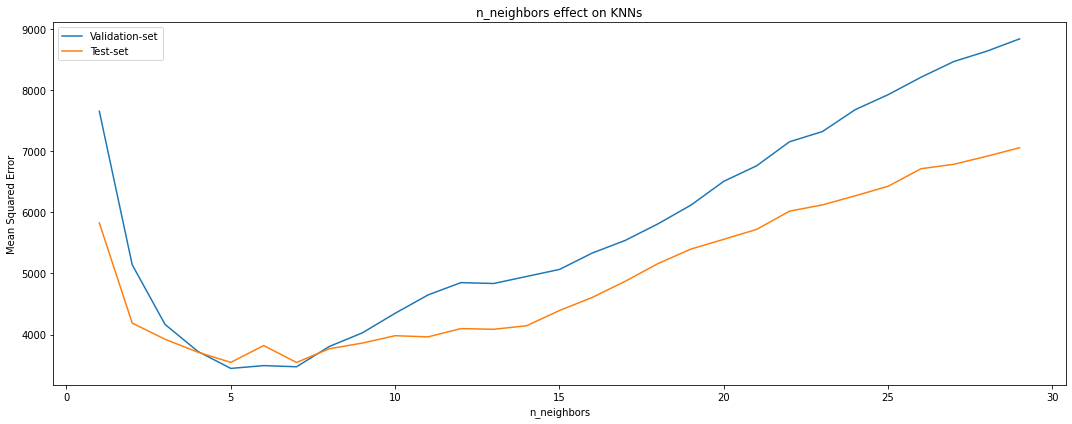

In [141]:
from sklearn.neighbors import KNeighborsRegressor
validation_acc = {}
test_acc = {}
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    validation_acc[i] = metrics.mean_squared_error(y_cross,knn.predict(X_cross))
    test_acc[i] = metrics.mean_squared_error(y_test,knn.predict(X_test))

plt.figure(figsize=(15,6))
plt.title('n_neighbors effect on KNNs')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error')
plt.plot(list(validation_acc.keys()),list(validation_acc.values()),label = "Validation-set")
plt.plot(list(test_acc.keys()),list(test_acc.values()),label = "Test-set")
plt.tight_layout()
plt.legend()
plt.show()

In [142]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train,y_train)
reportRegressor(knn,X_cross,y_cross,X_test,y_test)

Validation-set:
	Mean Squared Error:  3490.7198327359615 
	R2 Score:  0.7583336917356528

Test-set:
	Mean Squared Error:  3819.1846685741534 
	R2 Score:  0.7163893618543424

Random Predicts on Test-set:
	Mean Squared Error:  20508.875536480686 
	R2 Score:  -0.5229782750260896


# Voting

In [143]:
from sklearn.ensemble import VotingRegressor
vc = VotingRegressor(estimators=[('rf',rfr) , ('kn',knn) , ('sv',svr), ('dt',decisionTree)])
vc.fit(X_train,y_train)
reportRegressor(vc,X_cross,y_cross,X_test,y_test)

Validation-set:
	Mean Squared Error:  3167.164902860034 
	R2 Score:  0.7807337493657605

Test-set:
	Mean Squared Error:  3263.541760594144 
	R2 Score:  0.7576511109941536

Random Predicts on Test-set:
	Mean Squared Error:  20280.103004291846 
	R2 Score:  -0.5059897475065502


In [272]:
a = []
b = []
for i in (decisionTree.predict(X_test)):
    if i>150:
        a.append('Memory')
    else:
        a.append('Amnesia')
for i in y_test:
    if i>150:
        b.append('Memory')
    else:
        b.append('Amnesia')
print(metrics.classification_report(b,a))

              precision    recall  f1-score   support

     Amnesia       0.93      0.92      0.92       112
      Memory       0.93      0.93      0.93       121

    accuracy                           0.93       233
   macro avg       0.93      0.93      0.93       233
weighted avg       0.93      0.93      0.93       233



In [504]:
acc = []
preds = decisionTree.predict(X_test)
for i in range(len(preds)):
    if (abs(preds[i] - list(y_test)[i]) < 100):
        acc.append('True')
    else:
        acc.append('False')
acc.count('True')/len(acc)

0.9227467811158798

# Neural Networks

In [280]:
import random
import numpy as np
import torchvision
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.functional as F
import time
from datetime import timedelta
from datetime import datetime
from sklearn.model_selection import train_test_split

In [281]:
class Model(nn.Module):
    def __init__(self, class_num, act=F.relu):

        super(Model, self).__init__()

        self.layer1 = nn.Linear(1 * 20, 4000)
        self.act1 = act

        self.layer2 = nn.Linear(4000, 2000)
        self.act2 = act


        self.layer3 = nn.Linear(2000, 1000)
        self.act3 = act

        self.layer4 = nn.Linear(1000, 500)
        self.act4 = act

        self.layer5 = nn.Linear(500, 250)
        self.act5 = act

        self.layer6 = nn.Linear(250, 1)

    def forward(self, x):

        x = x.view(x.size(0), -1)
        #Make it one-dimentional

        x = self.layer1(x)
        x = self.act1(x)

        x = self.layer2(x)
        x = self.act2(x)

        x = self.layer3(x)
        x = self.act3(x)

        x = self.layer4(x)
        x = self.act4(x)

        x = self.layer5(x)
        x = self.act5(x)

        x = self.layer6(x)
        return x

    
    def start_weights(self, constant):
  
        nn.init.constant_(self.layer1.weight, constant)
        self.layer1.bias.data.fill_(0)

        nn.init.constant_(self.layer2.weight, constant)
        self.layer2.bias.data.fill_(0)

        nn.init.constant_(self.layer3.weight, constant)
        self.layer3.bias.data.fill_(0)

        nn.init.constant_(self.layer4.weight, constant)
        self.layer4.bias.data.fill_(0)

        nn.init.constant_(self.layer5.weight, constant)
        self.layer5.bias.data.fill_(0)

        nn.init.constant_(self.layer6.weight, constant)
        self.layer6.bias.data.fill_(0)

In [ ]:
def fit(model, train_loader, device, criterion, optimizer, num_epochs=10):

    total_time = 0.

    # For the use of the function "plot_loss_changes" 
    loss_epoch = []

    for epoch in range(num_epochs):
        train_loss = 0.
        d1 = datetime.now()
        for images, labels in train_loader:
            #Go to GPU
            images = images.to(device)
            labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # images = images.view(1, -1)
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        # loss here is a tensor
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters with back propagation
        loss.backward()

        # Updating parameters
        optimizer.step()
        train_loss += loss.item()

      # statistics
      average_loss = train_loss / len(train_loader)

      loss_epoch.append(tuple([average_loss,epoch + 1]))

      d2 = datetime.now()
      delta = d2 - d1
      seconds = float(delta.total_seconds())
      total_time += seconds
      print('epoch %d, train_loss: %.3f, time elapsed: %s seconds' % (epoch + 1, average_loss, seconds))
  print('total training time: %.3f minutes' % (total_time / 60))
  return loss_epoch

In [283]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [491]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=20 ))
model.add(Dropout(0.1))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, activation='relu'))
model.summary()

# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)
# opt = keras.optimizers.SGD(learning_rate=lr_schedule)
# model.compile(loss='mean_squared_error', optimizer=opt)

# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['mse'])

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_381 (Dense)            (None, 20)                420       
_________________________________________________________________
dropout_239 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_382 (Dense)            (None, 2048)              43008     
_________________________________________________________________
dropout_240 (Dropout)        (None, 2048)              0         
_________________________________________________________________
dense_383 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
dropout_241 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_384 (Dense)            (None, 512)             

In [477]:
keras._estimator_type = 'regressor'

In [479]:
hist = model.fit(X_train, y_train,batch_size=128,epochs=110,validation_data=(X_cross, y_cross),verbose=2,validation_split=0.1,workers=10)

Train on 929 samples, validate on 186 samples
Epoch 1/110
 - 0s - loss: 3917.8737 - mse: 3917.8738 - val_loss: 2792.8709 - val_mse: 2792.8708
Epoch 2/110
 - 0s - loss: 3631.6681 - mse: 3631.6682 - val_loss: 2551.6374 - val_mse: 2551.6375
Epoch 3/110
 - 0s - loss: 3854.5790 - mse: 3854.5789 - val_loss: 3093.1949 - val_mse: 3093.1948
Epoch 4/110
 - 0s - loss: 3904.9199 - mse: 3904.9202 - val_loss: 2701.6360 - val_mse: 2701.6360
Epoch 5/110
 - 0s - loss: 4058.6612 - mse: 4058.6614 - val_loss: 2468.2307 - val_mse: 2468.2307
Epoch 6/110
 - 0s - loss: 3903.2946 - mse: 3903.2947 - val_loss: 2523.5336 - val_mse: 2523.5337
Epoch 7/110
 - 0s - loss: 4305.4085 - mse: 4305.4082 - val_loss: 2540.8543 - val_mse: 2540.8542
Epoch 8/110
 - 0s - loss: 3830.0280 - mse: 3830.0283 - val_loss: 3263.2976 - val_mse: 3263.2976
Epoch 9/110
 - 0s - loss: 4012.3554 - mse: 4012.3550 - val_loss: 2770.8326 - val_mse: 2770.8328
Epoch 10/110
 - 0s - loss: 3917.6731 - mse: 3917.6731 - val_loss: 2982.5985 - val_mse: 298

 - 0s - loss: 3680.0803 - mse: 3680.0801 - val_loss: 2805.6086 - val_mse: 2805.6086
Epoch 86/110


KeyboardInterrupt: 

In [480]:
reportRegressor(model,X_cross,y_cross,X_test,y_test)

Validation-set:
	Mean Squared Error:  2603.5211711964957 
	R2 Score:  0.7889918996474445

Test-set:
	Mean Squared Error:  3986.0669697935195 
	R2 Score:  0.7149722328384753

Random Predicts on Test-set:
	Mean Squared Error:  21757.70815450644 
	R2 Score:  -0.5558070200090766


In [489]:
model.get_weights()

[array([[-2.85370886e-01, -1.97760493e-01, -3.15350562e-01,
         -2.38181397e-01, -2.97318578e-01,  2.67540276e-01,
         -1.04573965e-01,  3.54311436e-01,  1.89054981e-01,
          2.88891662e-02,  1.31788582e-01,  1.84464052e-01,
          9.21993777e-02, -7.18760490e-02,  2.99532890e-01,
          3.03917021e-01, -4.35836129e-02,  5.92673570e-02,
          5.37532717e-02,  2.23843485e-01],
        [ 6.05430678e-02, -2.28492066e-01,  4.14299995e-01,
          4.20988053e-01, -3.31238449e-01,  3.86607528e-01,
         -3.55845124e-01,  3.82402182e-01, -4.59130518e-02,
         -1.04993731e-01,  1.13950958e-02, -1.14753030e-01,
          2.87735969e-01,  2.25785658e-01, -2.74717867e-01,
         -3.22113335e-01, -2.67952681e-01,  5.00045657e-01,
          1.55804604e-01, -1.67284518e-01],
        [-1.04459427e-01, -3.77345264e-01,  2.09386185e-01,
         -2.79391438e-01, -1.57453537e-01,  1.83191180e-01,
         -3.39340150e-01, -3.69516402e-01,  4.85383034e-01,
          4.

In [492]:
model.get_weights()

[array([[-0.2831486 , -0.02704114,  0.23697746, -0.03230539, -0.18719725,
         -0.16004743,  0.04462194, -0.08450988,  0.16583896,  0.00339937,
         -0.12779245, -0.11677733, -0.26199538, -0.23882784, -0.30735093,
         -0.00568643, -0.13917233, -0.25567594, -0.33959356,  0.16228795],
        [ 0.22955257, -0.36669323,  0.15267342, -0.33813718,  0.10838592,
         -0.33446884, -0.37554726,  0.2991972 , -0.08753332, -0.24000765,
         -0.10507822,  0.00211883,  0.02264351,  0.3325492 , -0.12421596,
         -0.13366014,  0.2540623 , -0.11066484,  0.23615927, -0.08171681],
        [-0.08234349,  0.3863296 ,  0.34996206, -0.16093832, -0.13290396,
          0.11649597,  0.03307521, -0.16559406,  0.06001663,  0.19610208,
         -0.15297748, -0.02800405,  0.20224595,  0.02831173,  0.1267094 ,
         -0.0772042 ,  0.3569011 , -0.307431  ,  0.01571363, -0.31010836],
        [ 0.13324547, -0.12713131,  0.36510575,  0.1467799 , -0.05095357,
         -0.32168338,  0.08815736, 

In [1]:
from keras.utils.vis_utils import plot_model
import graphviz
def _check_pydot():
    try:
        # Attempt to create an image of a blank graph
        # to check the pydot/graphviz installation.
        pydot.Dot.create(pydot.Dot())
    except Exception:
        # pydot raises a generic Exception here,
        # so no specific class can be caught.
        raise ImportError('Failed to import pydot. You must install pydot'
                          ' and graphviz for `pydotprint` to work.')
plot_model(model, show_shapes=True, show_layer_names=True)

In [429]:
reportRegressor(model,X_cross,y_cross,X_test,y_test)

Validation-set:
	Mean Squared Error:  2478.5668293637345 
	R2 Score:  0.799119099146582

Test-set:
	Mean Squared Error:  3645.58849341795 
	R2 Score:  0.73931849210188

Random Predicts on Test-set:
	Mean Squared Error:  21154.49356223176 
	R2 Score:  -0.512673547927897


In [431]:
from sklearn.ensemble import VotingRegressor
vc = VotingRegressor(estimators=[('rf',rfr) , ('kn',knn) , ('dt',decisionTree)])
vc.fit(X_train,y_train)
reportRegressor(vc,X_cross,y_cross,X_test,y_test)

Validation-set:
	Mean Squared Error:  2399.968153944838 
	R2 Score:  0.805489301691448

Test-set:
	Mean Squared Error:  3173.5779124422124 
	R2 Score:  0.7730700880965398

Random Predicts on Test-set:
	Mean Squared Error:  21890.3991416309 
	R2 Score:  -0.5652952238122615


In [250]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [336]:
inputs = keras.Input(shape=(20,))
dense_layer = layers.Dense(64, activation="relu")
x = dense_layer(inputs)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="SDL_Model")

In [352]:
model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['mae'])

In [355]:
hist = model.fit(X_train, y_train,batch_size=64,epochs=200,validation_split=0.2,verbose=1)

Epoch 1/200
12/12 [==============================] - 0s 4ms/step - loss: 3132.2297 - mae: 40.8510 - val_loss: 5283.1909 - val_mae: 47.9774
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 3171.5249 - mae: 40.6721 - val_loss: 5107.6167 - val_mae: 48.6095
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 3143.6741 - mae: 40.9992 - val_loss: 5104.1562 - val_mae: 49.9001
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 3126.8081 - mae: 40.7778 - val_loss: 5161.1006 - val_mae: 47.9751
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 3159.1653 - mae: 40.9527 - val_loss: 5115.1836 - val_mae: 49.0111
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 3116.3823 - mae: 41.0091 - val_loss: 5420.3110 - val_mae: 48.2283
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 3104.5837 - mae: 40.6979 - val_loss: 5168.2383 - val_mae: 48.5839
Epoch 8/200
12/12 [========

12/12 [==============================] - 0s 3ms/step - loss: 3121.1833 - mae: 40.9287 - val_loss: 5201.0190 - val_mae: 48.7620
Epoch 118/200
12/12 [==============================] - 0s 3ms/step - loss: 3156.7554 - mae: 40.9255 - val_loss: 5190.5361 - val_mae: 48.9403
Epoch 119/200
12/12 [==============================] - 0s 3ms/step - loss: 3108.0852 - mae: 40.8630 - val_loss: 5479.3970 - val_mae: 47.9781
Epoch 120/200
12/12 [==============================] - 0s 3ms/step - loss: 3094.1174 - mae: 40.3593 - val_loss: 5168.0835 - val_mae: 48.7899
Epoch 121/200
12/12 [==============================] - 0s 3ms/step - loss: 3123.9771 - mae: 40.7375 - val_loss: 5163.6587 - val_mae: 48.6725
Epoch 122/200
12/12 [==============================] - 0s 3ms/step - loss: 3119.3372 - mae: 40.5905 - val_loss: 5156.5122 - val_mae: 49.7555
Epoch 123/200
12/12 [==============================] - 0s 3ms/step - loss: 3146.1262 - mae: 41.4350 - val_loss: 5525.7148 - val_mae: 48.3131
Epoch 124/200
12/12 [======

In [356]:
reportRegressor(model,X_cross,y_cross,X_test,y_test)

Validation-set:
	Mean Squared Error:  2858.944915097533 
	R2 Score:  0.7755466897734264

Test-set:
	Mean Squared Error:  3131.1775402324765 
	R2 Score:  0.7720841754040768

Random Predicts on Test-set:
	Mean Squared Error:  19912.523605150214 
	R2 Score:  -0.4494161314521441


In [584]:
acc = []
preds = vc.predict(X_test)
for i in range(len(preds)):
    if (abs(preds[i] - list(y_test)[i]) < 10):
        acc.append('True')
    else:
        acc.append('False')
acc.count('True')/len(acc)

0.19742489270386265

In [508]:
acc = []
preds = vc.predict(X_test)
for i in range(len(preds)):
    if (abs(preds[i] - list(y_test)[i]) < 100):
        acc.append('True')
    else:
        acc.append('False')
acc.count('True')/len(acc)

0.9055793991416309

In [509]:
acc = []
preds = vc.predict(X_test)
for i in range(len(preds)):
    if (abs(preds[i] - list(y_test)[i]) < 150):
        acc.append('True')
    else:
        acc.append('False')
acc.count('True')/len(acc)

0.9785407725321889

In [70]:
def plot_train_test_accuracies(trains,tests,labels):
    fig = plt.figure(figsize=(20,12),frameon=False)
    plt.xlabel('Model Type')
    plt.ylabel('Mean Squared Error')
    plt.axis('off')
    ax = fig.subplots()
    ax.yaxis.grid()
    ax.bar(np.arange(7) - 0.1, [6744.866,2955.728,2429.794,2448.570,2568.890,2590.800,2436.308] , 0.2 , label='Train' , color='salmon')
    ax.bar(np.arange(7) + 0.1, [7926.882,3332.318,3198.896,3196.457,3444.375,3492.698,3056.639] , 0.2 , label='Test' , color='c')
    ax.set_xticks(np.arange(7))
    ax.set_xticklabels(['Linear Regressor','SVM','Decision Tree','Random Forest','Nearest Neighbor','Neural Network',' Voting Model'])
    ax.set_title("MSE for each Model (train + test)")
    ax.legend()

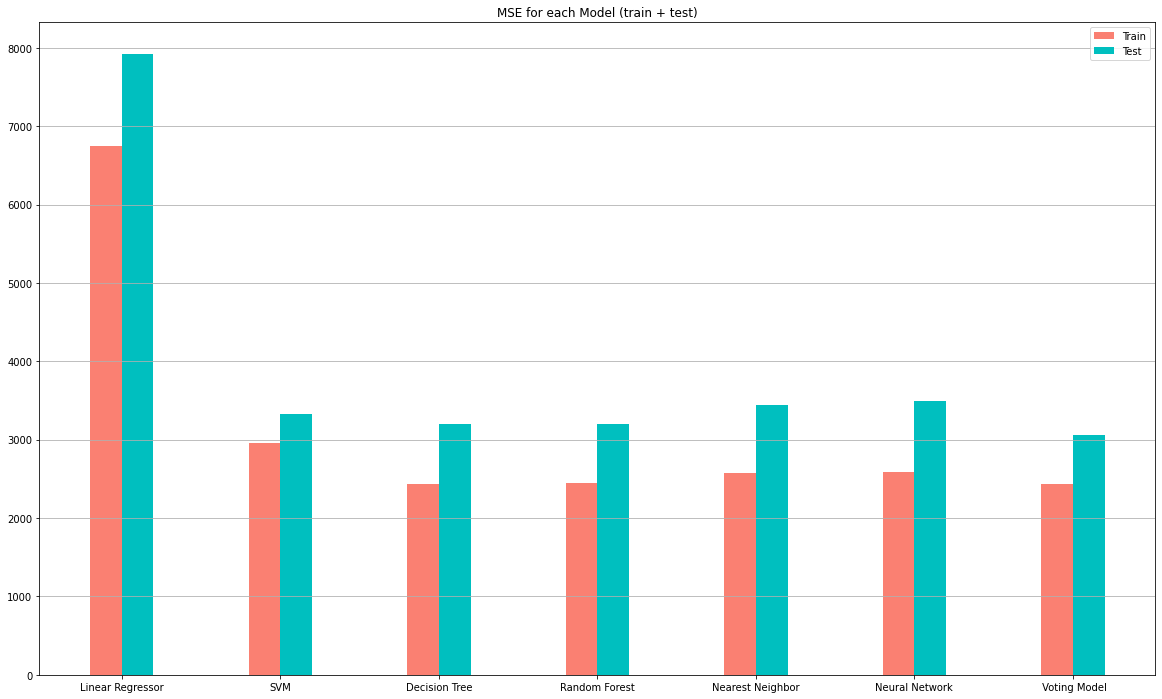

In [71]:
plot_train_test_accuracies(1,1,2)

In [68]:
def plot_train_test_accuracies(trains,tests,labels):
    fig = plt.figure(figsize=(20,12),frameon=False)
    plt.xlabel('Model Type')
    plt.ylabel('Mean Squared Error')
    plt.axis('off')
    ax = fig.subplots()
    ax.yaxis.grid()
    ax.bar(np.arange(7) - 0.1, [0.453,0.760,0.803,0.802,0.792,0.790,0.803] , 0.2 , label='Train' , color='salmon')
    ax.bar(np.arange(7) + 0.1, [0.433,0.762,0.771,0.771,0.754,0.750,0.781] , 0.2 , label='Test' , color='c')
    ax.set_xticks(np.arange(7))
    ax.set_xticklabels(['Linear Regressor','SVM','Decision Tree','Random Forest','Nearest Neighbor','Neural Network',' Voting Model'])
    ax.set_title("R2-Score for each Model (train + test)")
    ax.legend()

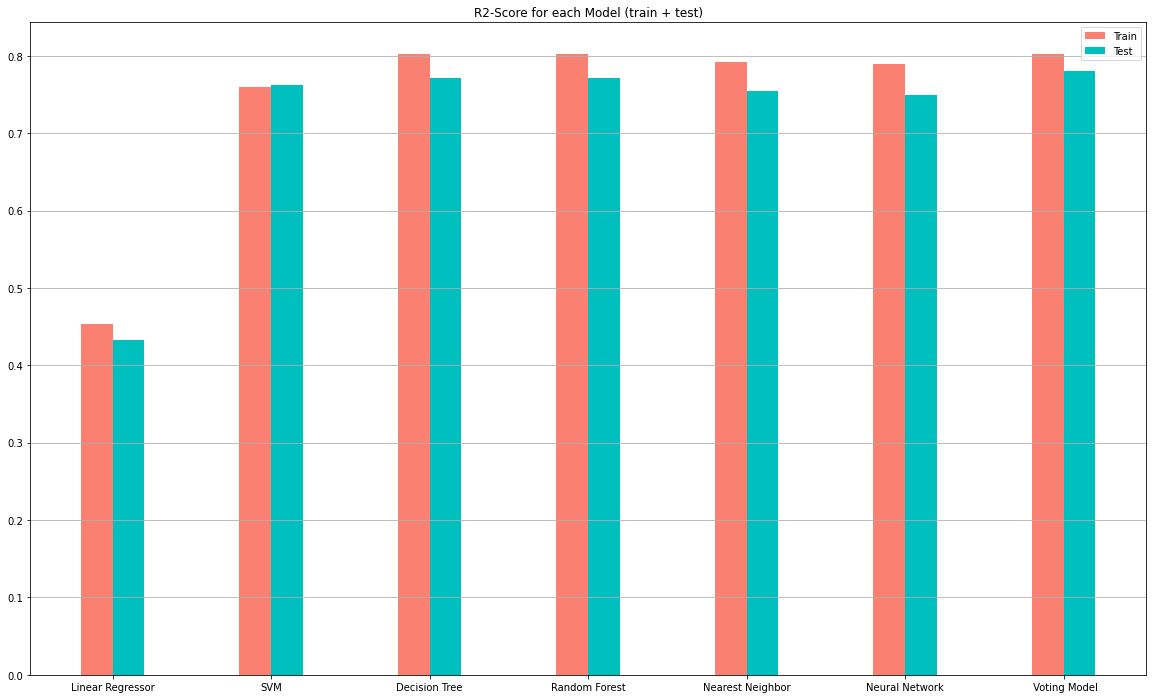

In [69]:
plot_train_test_accuracies(1,1,2)

In [ ]:
def plot_train_test_accuracies(trains,tests,labels):
    fig = plt.figure(figsize=(20,12),frameon=False)
    plt.xlabel('Model Type')
    plt.ylabel('Mean Squared Error')
    plt.axis('off')
    ax = fig.subplots()
    ax.yaxis.grid()
    ax.bar(np.arange(7) - 0.1, [0.453,0.760,0.803,0.802,0.792,0.790,0.803] , 0.2 , label='Train' , color='salmon')
    ax.bar(np.arange(7) + 0.1, [0.433,0.762,0.771,0.771,0.754,0.750,0.781] , 0.2 , label='Test' , color='c')
    ax.set_xticks(np.arange(7))
    ax.set_xticklabels(range(300))
    ax.set_title("R2-Score for each Model (train + test)")
    ax.legend()

In [146]:
y_test = list(y_test)

In [144]:
preds = vc.predict(X_test)
preds

array([280.88673511,  29.77354917, 247.85476845, 281.91927197,
       105.94109077,  50.13094215,  36.96048304, 248.16592878,
        41.4917829 , 105.94109077, 276.49746789, 150.00774004,
        44.82166788,  41.47779091,  55.84999708,  38.6345202 ,
       281.91927197, 267.10216813, 281.91927197, 239.05531108,
        92.91471326,  36.96048304, 241.75478733,  43.48493519,
        76.12334994,  46.30930007, 273.87027652, 267.10216813,
        38.58231232, 273.87831222,  56.11184857, 256.87331926,
        25.85459782, 270.04996081, 192.44973209,  51.9918581 ,
        36.96048304, 282.12214759, 150.00774004, 194.56516245,
       270.14443675, 272.08628472,  50.13094215, 273.87831222,
        36.96048304, 257.26373659, 262.98218327,  51.9918581 ,
       220.48166973, 166.27268767,  69.35624125, 201.33998744,
        38.6345202 , 186.8267912 , 267.10216813,  41.6451967 ,
        36.96048304,  32.84013004, 260.90415155, 256.87331926,
        41.47779091, 272.08628472, 286.61733934,  51.99

In [163]:
len(preds)

233

In [149]:
y_test[1]

11

In [155]:
d = pd.DataFrame(columns=['Model Prediction','Real Value'])

In [157]:
d['Model Prediction'] = preds
d['Real Value'] = y_test

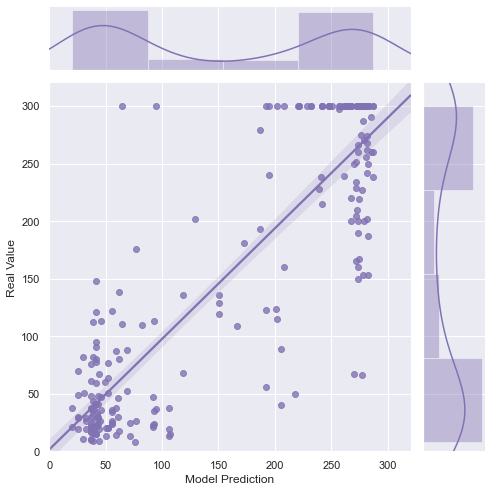

In [162]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("Model Prediction", "Real Value", data=d,
                  kind="reg", truncate=False,
                  xlim=(0, 320), ylim=(0, 320),
                  color="m", height=7)